# Selected Pictures for Manual Annotation

To ensure that the manual annotator tool matches the categories used by the automatic annotator (e.g., DeepFace), we'll use the same categories that DeepFace uses for gender, race, and age annotations.

Automatic Annotation Categories:

**Gender:** DeepFace typically returns "Man" or "Woman" for gender.

**Race/Ethnicity:** DeepFace returns a dominant race from the following categories:

- asian
- indian
- black
- white
- middle eastern
- latino hispanic

**Age:** DeepFace provides age as an integer, but we convert it into age groups.

In [2]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

In [6]:


# Define the data in the specified order, starting with "baby" images and moving down each age group
data = {
    "Image Names": [
        # Babies (0-1)
        "ffhq_130", "ffhq_0", "image0020311", "Image0001063", "ffhq_30", "image0016644",
        
        # Child (1-9)
        "Ffhq_48", "Image0011562", "Ffhq_357", "Image0020189", "image0018838", "Ffhq_7",
        
        # Adolescent (10-19)
        "Image0019021", "Image0001685", "Image0000866", "Ffhq_15", "Image0012755", "image0006264",
        
        # Young Adult (20-29)
        "Ffhq_15", "Ffhq_367", "Ffhq_74", "Image0020274", "Ffhq_36", "Image0003731",
        
        # Middle-aged (30-49)
        "Ffhq_3", "Ffhq_54", "Ffhq_164", "image0016204", "Image0003108", "Ffhq_10",
        
        # Older Adult (50-65)
        "image0016331", "Image0013449", "Ffhq_72", "Ffhq_107", "Ffhq_736", "Image0002926",
        
        # And elderly (65+)
        "Image0013196", "ffhq_498", "Ffhq_20", "Image0023529", "Image0006237", "image0035153"
    ],
    "FolderNames": [
        # Babies (0-1)
        "neutral", "neutral", "sad", "anger", "surprise", "fear",
        
        # Child (1-9)
        "disgust", "disgust", "happy", "sad", "fear", "happy",
        
        # Adolescent (10-19)
        "contempt", "fear", "disgust", "surprise", "fear", "contempt",
        
        # Young Adult (20-29)
        "neutral", "surprise", "contempt", "sad", "disgust", "fear",
        
        # Middle-aged (30-49)
        "happy", "neutral", "happy", "sad", "anger", "happy",
        
        # Older Adult (50-65)
        "sad", "fear", "neutral", "neutral", "neutral", "disgust",
        
        # And elderly (65+)
        "contempt", "neutral", "disgust", "surprise", "sad", "contempt"
    ],
    "age": [
        # Babies (0-1)
        "baby (0-1)", "baby (0-1)", "baby (0-1)", "baby (0-1)", "baby (0-1)", "baby (0-1)",
        
        # Child (1-9)
        "child (1-9)", "child (1-9)", "child (1-9)", "child (1-9)", "child (1-9)", "child (1-9)",
        
        # Adolescent (10-19)
        "adolescent (10-19)", "adolescent (10-19)", "adolescent (10-19)", "adolescent (10-19)", "adolescent (10-19)", "adolescent (10-19)",
        
        # Young Adult (20-29)
        "young adult (20-29)", "young adult (20-29)", "young adult (20-29)", "young adult (20-29)", "young adult (20-29)", "young adult (20-29)",
        
        # Middle-aged (30-49)
        "middle-aged (30-49)", "middle-aged (30-49)", "middle-aged (30-49)", "middle-aged (30-49)", "middle-aged (30-49)", "middle-aged (30-49)",
        
        # Older Adult (50-65)
        "older adult (50-65)", "older adult (50-65)", "older adult (50-65)", "older adult (50-65)", "older adult (50-65)", "older adult (50-65)",
        
        # And elderly (65+)
        "and elderly (65+)", "and elderly (65+)", "and elderly (65+)", "and elderly (65+)", "and elderly (65+)", "and elderly (65+)"
    ],
    "gender": ["Woman", "Woman", "Man", "Woman", "Man", "Man",
               "Woman", "Man", "Man", "Man", "Man", "Man",
               "Woman", "Woman", "Man", "Man", "Man", "Woman",
               "Woman", "Man", "Woman", "Woman", "Woman", "Man",
               "Woman", "Man", "Man", "Woman", "Man", "Woman",
               "Woman", "Woman", "Man", "Woman", "Man", "Man",
               "Man", "Woman", "Man", "Woman", "Man", "Woman"
        
    ],
    "ethnicity": [
        # Babies (0-1)
        "Asian", "Indian", "Black", "White", "Middle eastern", "Latino hispanic",
        
        # Child (1-9)
        "Asian", "Indian", "Black", "White", "Middle eastern", "Latino hispanic",
        
        # Adolescent (10-19)
        "Asian", "Indian", "Black", "White", "Middle eastern", "Latino hispanic",
        
        # Young Adult (20-29)
        "Asian", "Indian", "Black", "White", "Middle eastern", "Latino hispanic",
        
        # Middle-aged (30-49)
        "Asian", "Indian", "Black", "White", "Middle eastern", "Latino hispanic",
        
        # Older Adult (50-65)
        "Asian", "Indian", "Black", "White", "Middle eastern", "Latino hispanic",
        
        # And elderly (65+)
        "Asian", "Indian", "Black", "White", "Middle eastern", "Latino hispanic"
    ],
    "emotions": [
        # Babies (0-1)
        "neutral", "neutral", "sad", "anger", "surprise", "fear",
        
        # Child (1-9)
        "disgust", "disgust", "happy", "sad", "fear", "happy",
        
        # Adolescent (10-19)
        "contempt", "fear", "disgust", "surprise", "fear", "contempt",
        
        # Young Adult (20-29)
        "neutral", "surprise", "contempt", "sad", "disgust", "fear",
        
        # Middle-aged (30-49)
        "happy", "neutral", "happy", "sad", "anger", "happy",
        
        # Older Adult (50-65)
        "sad", "fear", "neutral", "neutral", "neutral", "disgust",
        
        # And elderly (65+)
        "contempt", "neutral", "disgust", "surprise", "sad", "contempt"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
output_file = "SelectedPictures.csv"
df.to_csv(output_file, index=False)

print(f"CSV file '{output_file}' created successfully.")


CSV file 'SelectedPictures.csv' created successfully.


In [7]:
df

,Image Names,FolderNames,age,gender,ethnicity,emotions
0,ffhq_130,neutral,baby (0-1),Woman,Asian,neutral
1,ffhq_0,neutral,baby (0-1),Woman,Indian,neutral
2,image0020311,sad,baby (0-1),Man,Black,sad
3,Image0001063,anger,baby (0-1),Woman,White,anger
4,ffhq_30,surprise,baby (0-1),Man,Middle eastern,surprise
5,image0016644,fear,baby (0-1),Man,Latino hispanic,fear
6,Ffhq_48,disgust,child (1-9),Woman,Asian,disgust
7,Image0011562,disgust,child (1-9),Man,Indian,disgust
8,Ffhq_357,happy,child (1-9),Man,Black,happy
9,Image0020189,sad,child (1-9),Man,White,sad


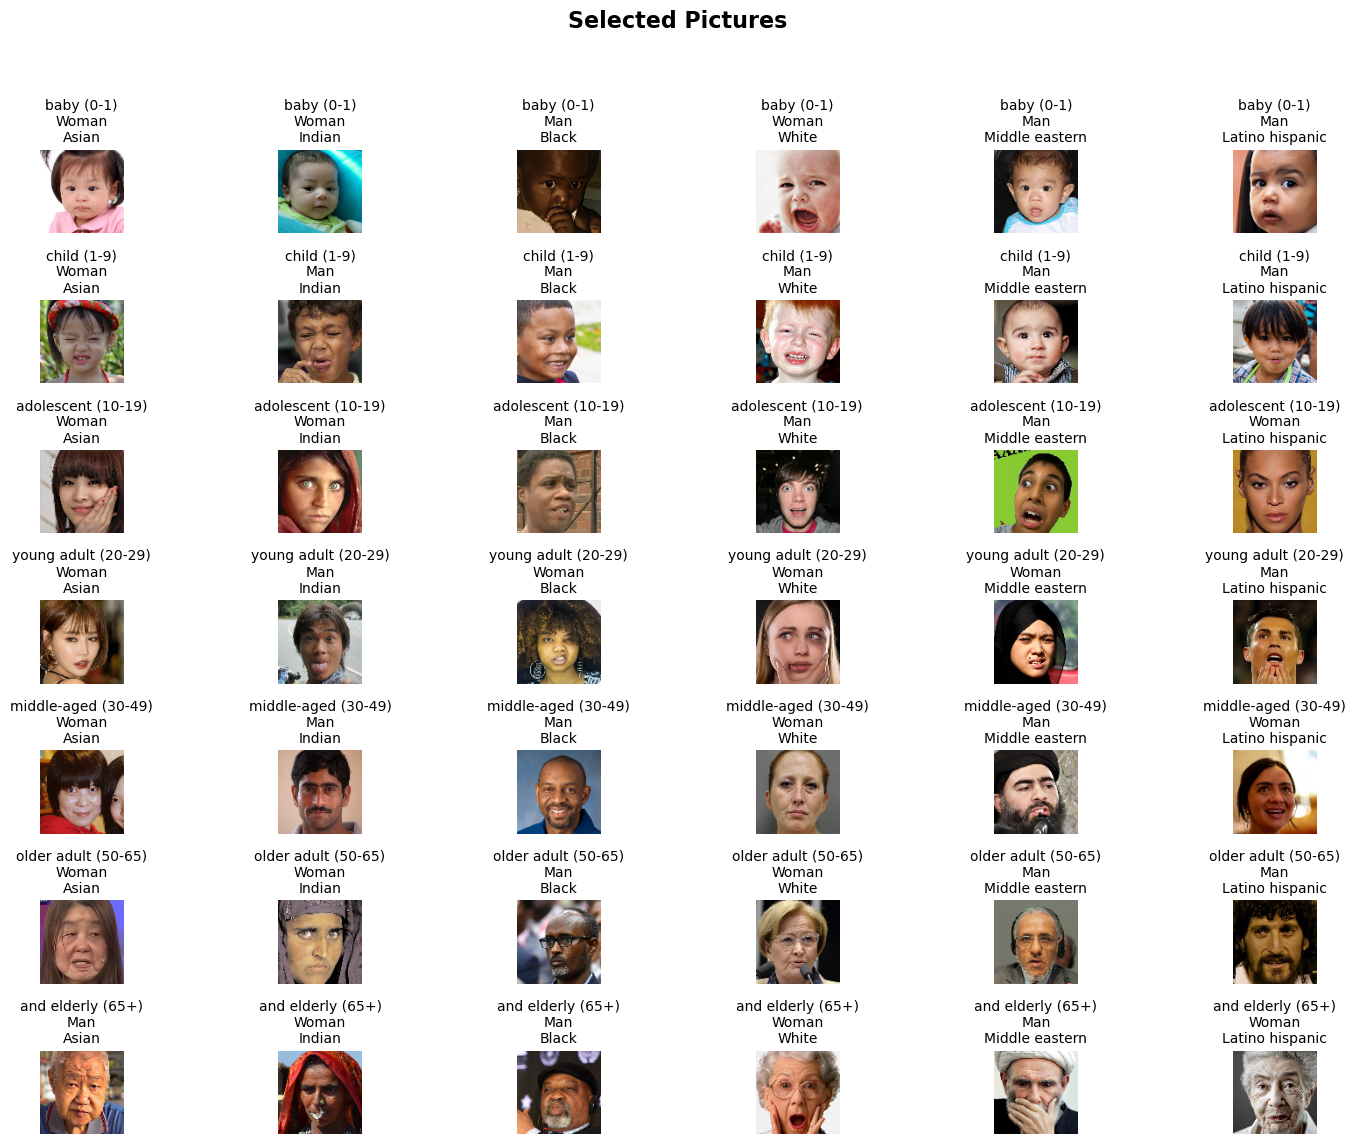

In [13]:
# Set base directory path
base_dir = "../../3_image_datasets/affectnet/SelectionManualAnnotation/AffectNet"  # Replace with the actual path

# Set up the grid dimensions
fig, axes = plt.subplots(7, 6, figsize=(15, 12))  

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Track the index of the image we're displaying
for idx, (index, row) in enumerate(df.iterrows()):
    if idx >= 42:  # Stop after displaying 42 images (6x7 grid)
        break

    image_name = row["Image Names"]
    folder_name = row["FolderNames"]
    
    # Construct possible paths with both .jpg and .png extensions
    image_path_jpg = os.path.join(base_dir, folder_name, image_name + ".jpg")
    image_path_png = os.path.join(base_dir, folder_name, image_name + ".png")
    
    # Try to open the image file
    if os.path.exists(image_path_jpg):
        img = Image.open(image_path_jpg)
    elif os.path.exists(image_path_png):
        img = Image.open(image_path_png)
    else:
        print(f"Image not found: {image_name} in folder {folder_name}")
        continue  # Skip to the next image if neither file exists

    # Display the image on the grid
    axes[idx].imshow(img)
    axes[idx].axis("off")
    
    # Prepare title with age, gender, and ethnicity information
    age = row["age"]
    gender = row["gender"]
    ethnicity = row["ethnicity"]

   
    title = f"{age}\n{gender}\n{ethnicity}"
    axes[idx].set_title(title, fontsize=10, color="black")

# Hide any remaining empty subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

# Add a main title for the entire figure
fig.suptitle("Selected Pictures", fontsize=16, fontweight="bold")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the main title

plt.savefig('SelectedPictures.pdf', format='pdf', bbox_inches='tight')  
plt.show()